In [1]:
!pip install scikit-learn-extra

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from scipy.stats import norm
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import pickle

In [3]:
# Surpress warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [4]:
pd.DataFrame.iteritems = pd.DataFrame.items

In [5]:
# Retrieve dataset and read first 5 rows
macroNutrient_mean =pd.read_csv(r"../Dataset/Dataset_for_EDA/macroNutrient_mean.csv", encoding= 'unicode_escape')
macroNutrient_mean

No.                                        Description       Category  \
0     15155                          ABALONE,MIXED SPECIES,RAW        ABALONE   
1     15156                           ABALONE,MXD SP,CKD,FRIED        ABALONE   
2      9427                                        ABIYUCH,RAW        ABIYUCH   
3      9002                                  ACEROLA JUICE,RAW  ACEROLA JUICE   
4      9001                   ACEROLA,(WEST INDIAN CHERRY),RAW        ACEROLA   
...     ...                                                ...            ...   
8785   1119        YOGURT,VANILLA,LOFAT,11 GRAMS PROT PER 8 OZ         YOGURT   
8786   1220  YOGURT,VANILLA,LOFAT,11 GRAMS PROT PER 8 OZ,FO...         YOGURT   
8787   1295                             YOGURT,VANILLA,NON-FAT         YOGURT   
8788  16004                 YOKAN,PREP FROM ADZUKI BNS & SUGAR          YOKAN   
8789   3217                                           ZWIEBACK       ZWIEBACK   

      Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0               105             6.01       17.10            0.76   
1               189            11.05       19.63            6.78   
2                69            17.60        1.50            0.10   
3                23             4.80        0.40            0.30   
4                32             7.69        0.40            0.30   
...             ...              ...         ...             ...   
8785             85            13.80        4.93            1.25   
8786             85            13.80        4.93            1.25   
8787             78            17.04        2.94            0.00   
8788            260            60.72        3.29            0.12   
8789            426            74.20       10.10            9.70   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.107000                        0.104000   
1                           2.741000                        1.676000   
2                           4.081006                        2.288767   
3                           0.082000                        0.090000   
4                           0.082000                        0.090000   
...                              ...                             ...   
8785                        0.343000                        0.036000   
8786                        0.343000                        0.036000   
8787                        0.000000                        0.000000   
8788                        0.011000                        0.026000   
8789                        4.244000                        2.073000   

      Saturated Fatty Acids(g)  
0                        0.149  
1                        1.646  
2                        0.014  
3                        0.068  
4                        0.068  
...                        ...  
8785                     0.806  
8786                     0.806  
8787                     0.000  
8788                     0.043  
8789                     2.525  

[8790 rows x 10 columns]

In [6]:
macroNutrient_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   No.                             8790 non-null   int64  
 1   Description                     8790 non-null   object 
 2   Category                        8790 non-null   object 
 3   Energy (Kcal)                   8790 non-null   int64  
 4   Carbohydrate(g)                 8790 non-null   float64
 5   Protein(g)                      8790 non-null   float64
 6   Total Lipid(g)                  8790 non-null   float64
 7   Monounsaturated Fatty Acids(g)  8790 non-null   float64
 8   Polyunsaturated Fatty Acids(g)  8790 non-null   float64
 9   Saturated Fatty Acids(g)        8790 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 686.8+ KB


In [7]:
macroNutrient_mean.describe()

No.  Energy (Kcal)  Carbohydrate(g)   Protein(g)  \
count   8790.000000    8790.000000      8790.000000  8790.000000   
mean   15663.495222     226.317634        22.127710    11.342849   
std     9251.413586     169.877539        27.270822    10.530474   
min     1001.000000       0.000000         0.000000     0.000000   
25%     9086.250000      91.000000         0.050000     2.380000   
50%    14427.500000     191.000000         9.340000     8.000000   
75%    20142.750000     337.000000        34.910000    19.880000   
max    93600.000000     902.000000       100.000000    88.320000   

       Total Lipid(g)  Monounsaturated Fatty Acids(g)  \
count     8790.000000                     8790.000000   
mean        10.553725                        4.081006   
std         15.814842                        6.739902   
min          0.000000                        0.000000   
25%          0.950000                        0.304000   
50%          5.140000                        2.293500   
75%         13.720000                        4.759000   
max        100.000000                       83.689000   

       Polyunsaturated Fatty Acids(g)  Saturated Fatty Acids(g)  
count                     8790.000000               8790.000000  
mean                         2.288767                  3.576334  
std                          5.014458                  6.388101  
min                          0.000000                  0.000000  
25%                          0.249000                  0.259000  
50%                          0.813500                  1.740000  
75%                          2.288767                  4.173750  
max                         74.623000                 95.600000

In [8]:
macroNutrient_mean.head()

No.                       Description       Category  Energy (Kcal)  \
0  15155         ABALONE,MIXED SPECIES,RAW        ABALONE            105   
1  15156          ABALONE,MXD SP,CKD,FRIED        ABALONE            189   
2   9427                       ABIYUCH,RAW        ABIYUCH             69   
3   9002                 ACEROLA JUICE,RAW  ACEROLA JUICE             23   
4   9001  ACEROLA,(WEST INDIAN CHERRY),RAW        ACEROLA             32   

   Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0             6.01       17.10            0.76   
1            11.05       19.63            6.78   
2            17.60        1.50            0.10   
3             4.80        0.40            0.30   
4             7.69        0.40            0.30   

   Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                        0.107000                        0.104000   
1                        2.741000                        1.676000   
2                        4.081006                        2.288767   
3                        0.082000                        0.090000   
4                        0.082000                        0.090000   

   Saturated Fatty Acids(g)  
0                     0.149  
1                     1.646  
2                     0.014  
3                     0.068  
4                     0.068

In [9]:
float_columns = [x for x in macroNutrient_mean.columns if x not in ['No.', 'Description', 'Category']]

In [10]:
skew_columns = (macroNutrient_mean[float_columns]
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
print("{} of the 7 columns are skewed with the vast majority being heavily skewed".format(len(skew_columns)))
skew_columns

7 of the 7 columns are skewed with the vast majority being heavily skewed


Saturated Fatty Acids(g)          6.723960
Polyunsaturated Fatty Acids(g)    6.399133
Monounsaturated Fatty Acids(g)    4.744776
Total Lipid(g)                    3.309724
Protein(g)                        1.166368
Energy (Kcal)                     1.148610
Carbohydrate(g)                   1.127598
dtype: float64

In [11]:
# Perform log transform on skewed columns
for col in skew_columns.index.tolist():
    macroNutrient_mean[col] = np.log1p(macroNutrient_mean[col])

In [12]:
macroNutrient_mean[float_columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          4.663439         1.947338    2.895912        0.565314   
1          5.247024         2.489065    3.026746        2.051556   
2          4.248495         2.923162    0.916291        0.095310   
3          3.178054         1.757858    0.336472        0.262364   
4          3.496508         2.162173    0.336472        0.262364   
...             ...              ...         ...             ...   
8785       4.454347         2.694627    1.780024        0.810930   
8786       4.454347         2.694627    1.780024        0.810930   
8787       4.369448         2.892592    1.371181        0.000000   
8788       5.564520         4.122608    1.456287        0.113329   
8789       6.056784         4.320151    2.406945        2.370244   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.101654                        0.098940   
1                           1.319353                        0.984323   
2                           1.625509                        1.190513   
3                           0.078811                        0.086178   
4                           0.078811                        0.086178   
...                              ...                             ...   
8785                        0.294906                        0.035367   
8786                        0.294906                        0.035367   
8787                        0.000000                        0.000000   
8788                        0.010940                        0.025668   
8789                        1.657085                        1.122654   

      Saturated Fatty Acids(g)  
0                     0.138892  
1                     0.973049  
2                     0.013903  
3                     0.065788  
4                     0.065788  
...                        ...  
8785                  0.591114  
8786                  0.591114  
8787                  0.000000  
8788                  0.042101  
8789                  1.259880  

[8790 rows x 7 columns]

In [13]:
macroNutrient_mean.describe()

No.  Energy (Kcal)  Carbohydrate(g)   Protein(g)  \
count   8790.000000    8790.000000      8790.000000  8790.000000   
mean   15663.495222       5.065342         2.137177     2.047259   
std     9251.413586       0.997539         1.615109     1.068937   
min     1001.000000       0.000000         0.000000     0.000000   
25%     9086.250000       4.521789         0.048790     1.217876   
50%    14427.500000       5.257495         2.336020     2.197225   
75%    20142.750000       5.823046         3.581016     3.038792   
max    93600.000000       6.805723         4.615121     4.492225   

       Total Lipid(g)  Monounsaturated Fatty Acids(g)  \
count     8790.000000                     8790.000000   
mean         1.770891                        1.168249   
std          1.183944                        0.904910   
min          0.000000                        0.000000   
25%          0.667829                        0.265436   
50%          1.814823                        1.191951   
75%          2.689207                        1.750764   
max          4.615121                        4.438986   

       Polyunsaturated Fatty Acids(g)  Saturated Fatty Acids(g)  
count                     8790.000000               8790.000000  
mean                         0.802865                  1.076738  
std                          0.739067                  0.875555  
min                          0.000000                  0.000000  
25%                          0.222343                  0.230318  
50%                          0.595259                  1.007958  
75%                          1.190513                  1.643598  
max                          4.325760                  4.570579

In [14]:
scaler = MinMaxScaler()
macroNutrient_mean[float_columns] = scaler.fit_transform(macroNutrient_mean[float_columns])

macroNutrient_mean.describe()

No.  Energy (Kcal)  Carbohydrate(g)   Protein(g)  \
count   8790.000000    8790.000000      8790.000000  8790.000000   
mean   15663.495222       0.744277         0.463082     0.455734   
std     9251.413586       0.146574         0.349960     0.237953   
min     1001.000000       0.000000         0.000000     0.000000   
25%     9086.250000       0.664410         0.010572     0.271107   
50%    14427.500000       0.772511         0.506167     0.489117   
75%    20142.750000       0.855610         0.775931     0.676456   
max    93600.000000       1.000000         1.000000     1.000000   

       Total Lipid(g)  Monounsaturated Fatty Acids(g)  \
count     8790.000000                     8790.000000   
mean         0.383715                        0.263179   
std          0.256536                        0.203855   
min          0.000000                        0.000000   
25%          0.144705                        0.059797   
50%          0.393234                        0.268519   
75%          0.582695                        0.394406   
max          1.000000                        1.000000   

       Polyunsaturated Fatty Acids(g)  Saturated Fatty Acids(g)  
count                     8790.000000               8790.000000  
mean                         0.185601                  0.235580  
std                          0.170853                  0.191563  
min                          0.000000                  0.000000  
25%                          0.051400                  0.050391  
50%                          0.137608                  0.220532  
75%                          0.275215                  0.359604  
max                          1.000000                  1.000000

In [15]:
X = macroNutrient_mean[float_columns]
X

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
1          0.770972         0.539328    0.673774        0.444529   
2          0.624253         0.633388    0.203973        0.020652   
3          0.466968         0.380891    0.074901        0.056849   
4          0.513760         0.468498    0.074901        0.056849   
...             ...              ...         ...             ...   
8785       0.654500         0.583869    0.396246        0.175712   
8786       0.654500         0.583869    0.396246        0.175712   
8787       0.642026         0.626764    0.305234        0.000000   
8788       0.817624         0.893283    0.324179        0.024556   
8789       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
1                           0.297219                        0.227549   
2                           0.366189                        0.275215   
3                           0.017754                        0.019922   
4                           0.017754                        0.019922   
...                              ...                             ...   
8785                        0.066435                        0.008176   
8786                        0.066435                        0.008176   
8787                        0.000000                        0.000000   
8788                        0.002465                        0.005934   
8789                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  
0                     0.030388  
1                     0.212894  
2                     0.003042  
3                     0.014394  
4                     0.014394  
...                        ...  
8785                  0.129330  
8786                  0.129330  
8787                  0.000000  
8788                  0.009211  
8789                  0.275650  

[8790 rows x 7 columns]

## Dimensionality Reduction

In [16]:
from clustering_function import dimensionality_reduction,scatter_plot_clustering

In [17]:
# Reduced to 2 dimensions using tsne
X_tsne_reduced, tsne_x_data, tsne_y_data, reduction_method = dimensionality_reduction(X, 't-SNE', n_components=2)

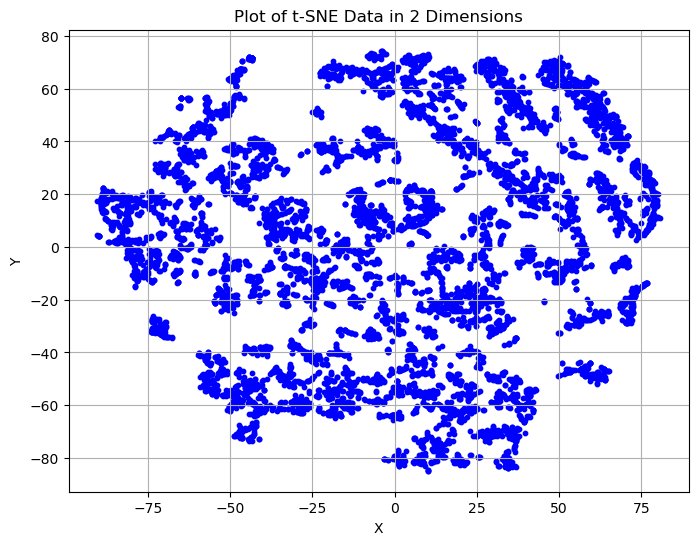

In [18]:
scatter_plot_clustering(tsne_x_data, tsne_y_data, reduction_method)

In [19]:
X_tsne_reduced

array([[-19.278519  ,  36.42441   ],
       [ 15.749258  ,  -7.4946456 ],
       [ -4.0185566 ,  15.355946  ],
       ...,
       [-62.909447  ,  -0.66525537],
       [-57.053795  , -40.996086  ],
       [  6.673937  , -44.721294  ]], dtype=float32)

In [20]:
pd.DataFrame(X_tsne_reduced).to_csv("../Dataset/Dataset_for_reduced_data/mean_reduced.csv")

In [21]:
# Reduced to 2 dimensions using pca
X_pca_reduced, pca_x_data, pca_y_data, reduction_method = dimensionality_reduction(X, 'PCA', n_components=2)

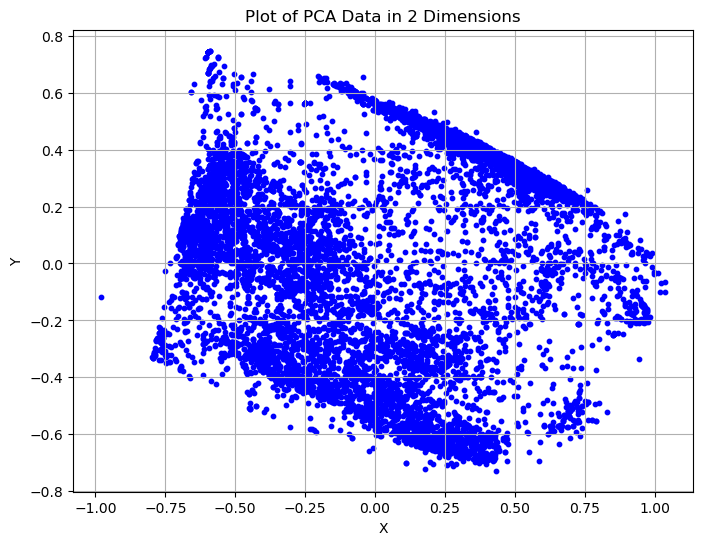

In [22]:
scatter_plot_clustering(pca_x_data, pca_y_data, reduction_method)

In [23]:
X_pca_reduced

array([[-0.29162287,  0.25191876],
       [ 0.10254084, -0.07240091],
       [-0.40616598, -0.06424727],
       ...,
       [-0.59365989,  0.08700263],
       [-0.63243765, -0.19283285],
       [ 0.02863125, -0.50863169]])

## K Means: Optimal number of clusters

#### Silhoutte Analysis

In [24]:
from clustering_function import plot_silhouette_analysis

For n_clusters = 2 The average silhouette_score is : 0.36323807
For n_clusters = 3 The average silhouette_score is : 0.41821146
For n_clusters = 4 The average silhouette_score is : 0.38409013
For n_clusters = 5 The average silhouette_score is : 0.3772101
For n_clusters = 6 The average silhouette_score is : 0.40993157
For n_clusters = 7 The average silhouette_score is : 0.40210006


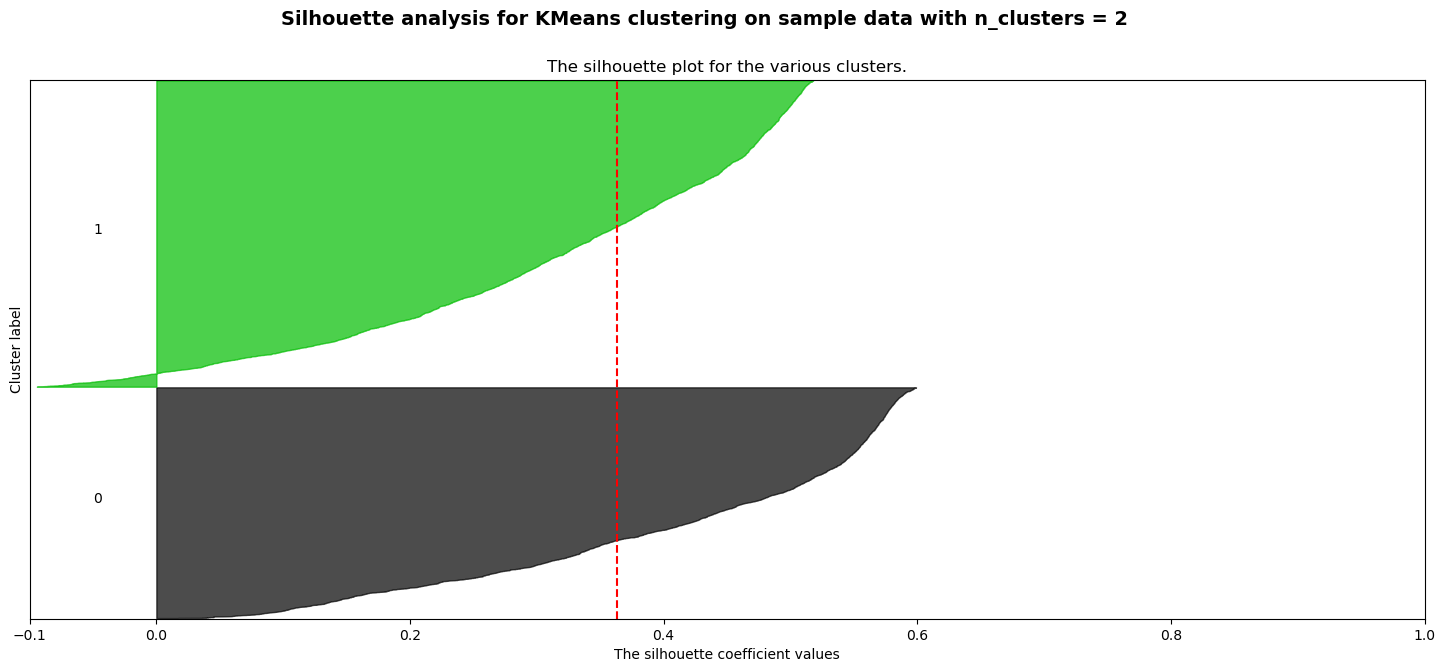

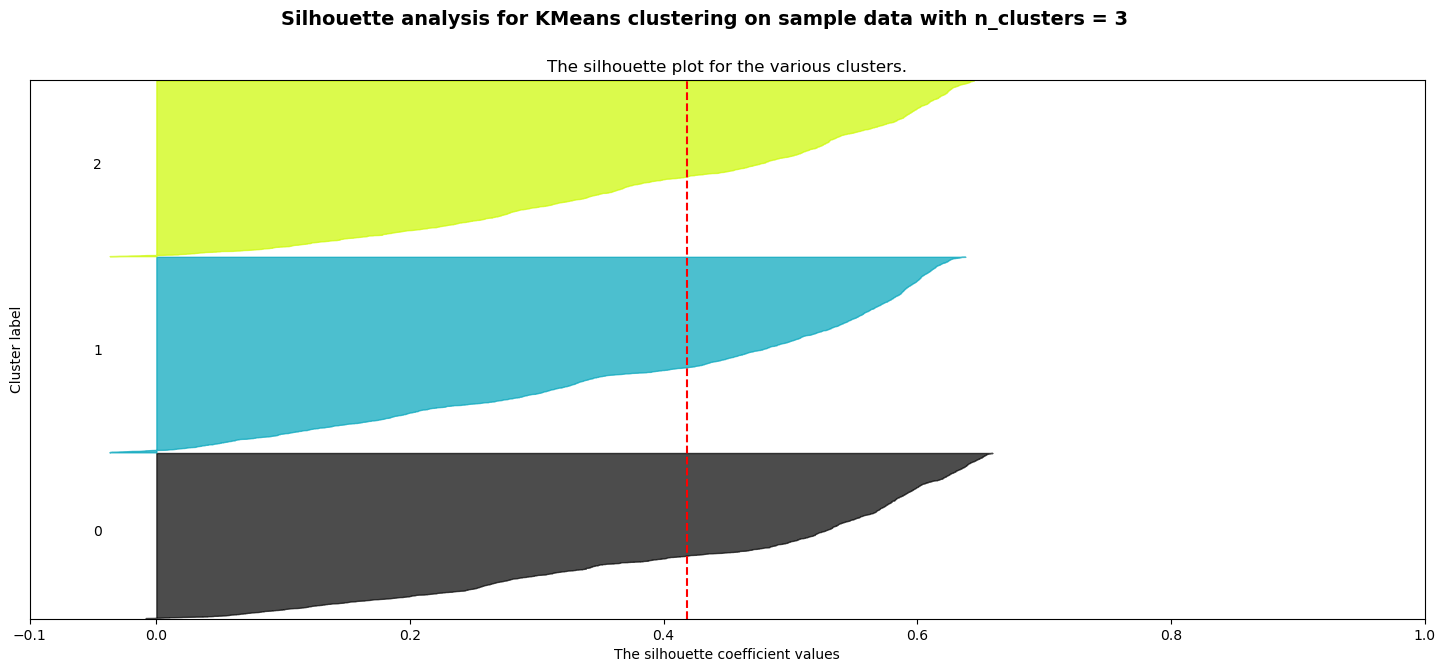

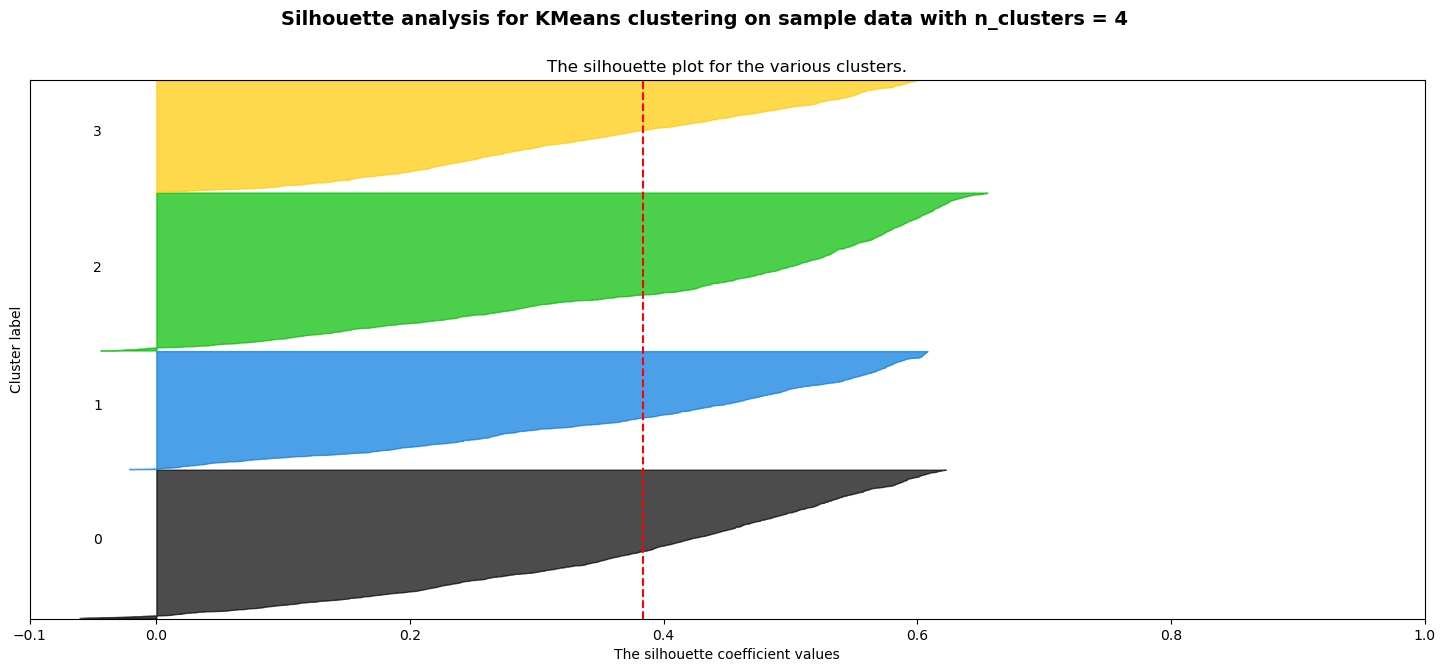

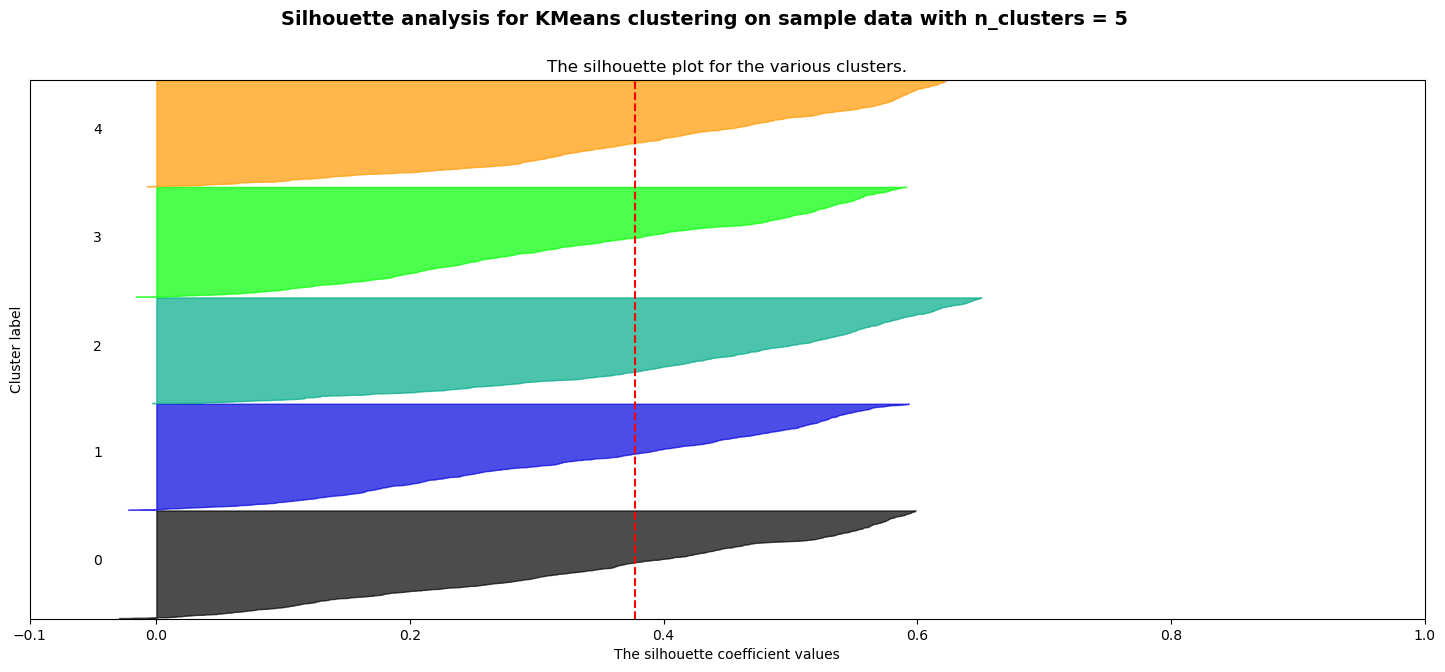

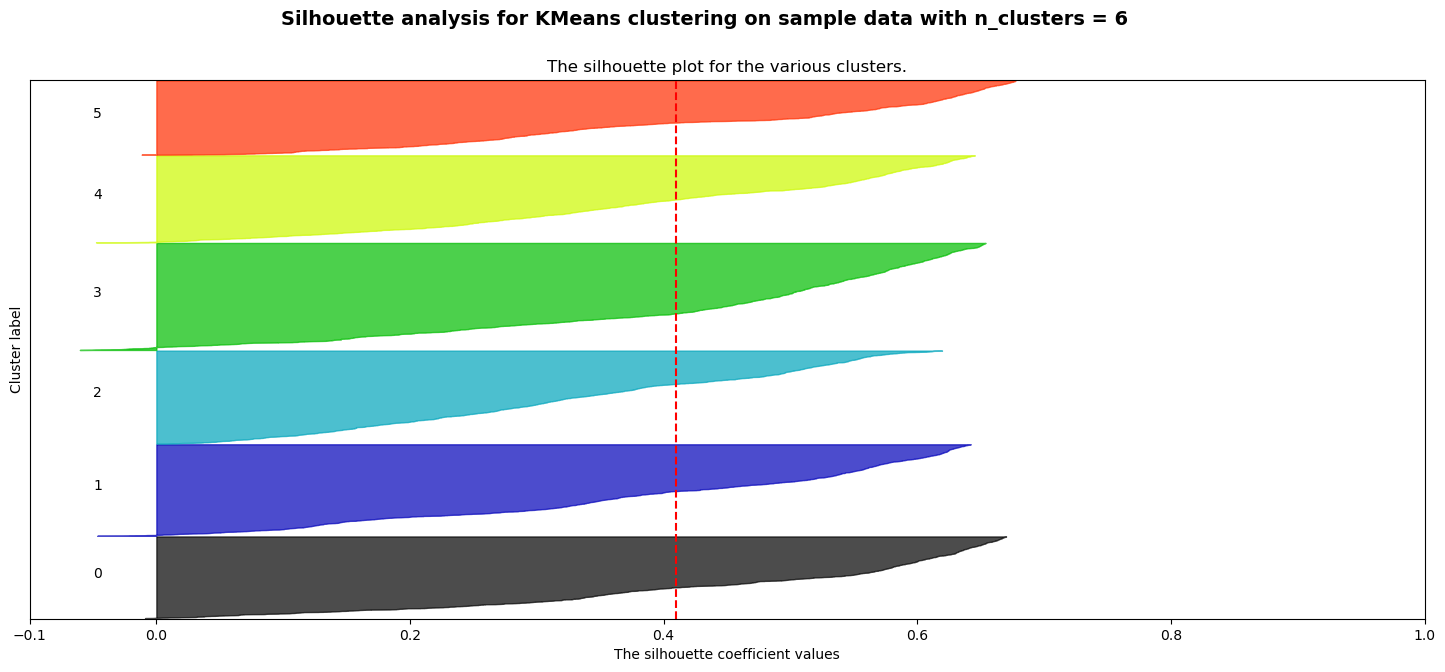

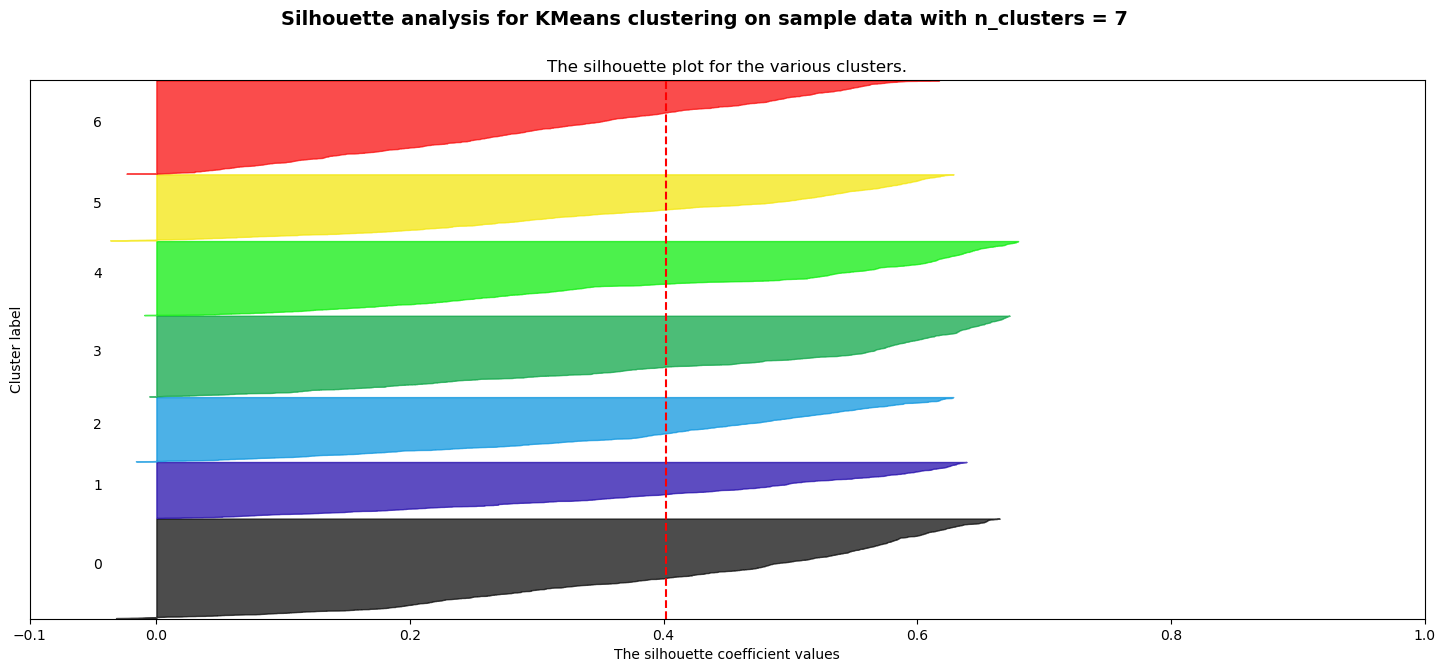

In [25]:
tsne_list_num_clusters = list(range(2,8))
plot_silhouette_analysis(X_tsne_reduced, tsne_list_num_clusters)

The food clusters around 3 and 4 are fairly balanced, according to the silhouette analysis graph. However, the number of clusters at which the highest Silhouette score was recorded was 3.

#### Elbow Method

In [26]:
from clustering_function import elbow_method_analysis

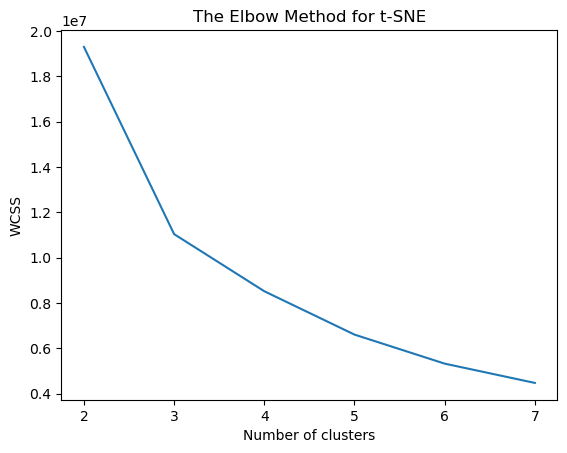

In [27]:
elbow_method_analysis(X_tsne_reduced)

Given that the elbow point falls at 3, the elbow method also suggests that 3 clusters will be the ideal number of clusters for K-Means.

## Clustering

In [28]:
# Trackers throughout each model
scores = {} # to track the silhoutte score of the tuned model
food_groups = {} # to track the counts of each group

In [29]:
X_with_labels = X.copy()
X_with_labels

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
1          0.770972         0.539328    0.673774        0.444529   
2          0.624253         0.633388    0.203973        0.020652   
3          0.466968         0.380891    0.074901        0.056849   
4          0.513760         0.468498    0.074901        0.056849   
...             ...              ...         ...             ...   
8785       0.654500         0.583869    0.396246        0.175712   
8786       0.654500         0.583869    0.396246        0.175712   
8787       0.642026         0.626764    0.305234        0.000000   
8788       0.817624         0.893283    0.324179        0.024556   
8789       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
1                           0.297219                        0.227549   
2                           0.366189                        0.275215   
3                           0.017754                        0.019922   
4                           0.017754                        0.019922   
...                              ...                             ...   
8785                        0.066435                        0.008176   
8786                        0.066435                        0.008176   
8787                        0.000000                        0.000000   
8788                        0.002465                        0.005934   
8789                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  
0                     0.030388  
1                     0.212894  
2                     0.003042  
3                     0.014394  
4                     0.014394  
...                        ...  
8785                  0.129330  
8786                  0.129330  
8787                  0.000000  
8788                  0.009211  
8789                  0.275650  

[8790 rows x 7 columns]

## K Means Clustering

In [30]:
from clustering_function import perform_kmeans_clustering, plot_clusters

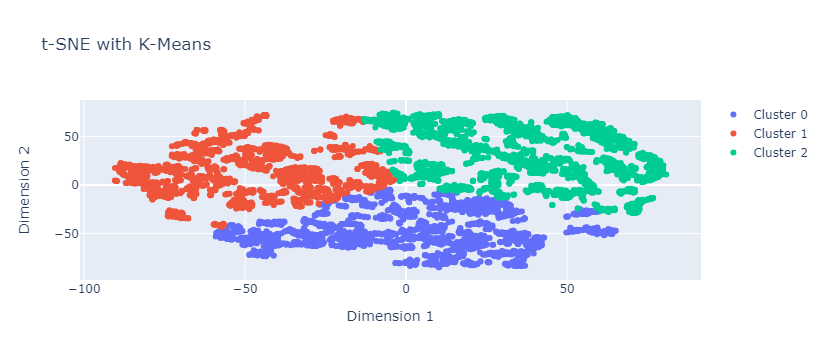

In [31]:
tsne_clust_labels, kmean_model = perform_kmeans_clustering(X_tsne_reduced, 3)
plot_clusters(X_tsne_reduced, tsne_clust_labels, 'K-Means')

In [32]:
# export model
with open('../Model_fitted/Kmeans_model_mean_pkl', 'wb') as files:
    pickle.dump(kmean_model, files)

In [33]:
X_with_labels['kmeans_tsne'] = tsne_clust_labels
scores['kmeans_tsne'] = (silhouette_score(X_tsne_reduced, X_with_labels['kmeans_tsne']))

X_with_labels

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
1          0.770972         0.539328    0.673774        0.444529   
2          0.624253         0.633388    0.203973        0.020652   
3          0.466968         0.380891    0.074901        0.056849   
4          0.513760         0.468498    0.074901        0.056849   
...             ...              ...         ...             ...   
8785       0.654500         0.583869    0.396246        0.175712   
8786       0.654500         0.583869    0.396246        0.175712   
8787       0.642026         0.626764    0.305234        0.000000   
8788       0.817624         0.893283    0.324179        0.024556   
8789       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
1                           0.297219                        0.227549   
2                           0.366189                        0.275215   
3                           0.017754                        0.019922   
4                           0.017754                        0.019922   
...                              ...                             ...   
8785                        0.066435                        0.008176   
8786                        0.066435                        0.008176   
8787                        0.000000                        0.000000   
8788                        0.002465                        0.005934   
8789                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  kmeans_tsne  
0                     0.030388            1  
1                     0.212894            0  
2                     0.003042            2  
3                     0.014394            1  
4                     0.014394            1  
...                        ...          ...  
8785                  0.129330            1  
8786                  0.129330            1  
8787                  0.000000            1  
8788                  0.009211            1  
8789                  0.275650            0  

[8790 rows x 8 columns]

In [34]:
from clustering_function import get_food_groups, plot_cluster_distribution

In [35]:
food_groups, value_counts = get_food_groups(X_with_labels['kmeans_tsne'], 'KMeans_tsne',food_groups)

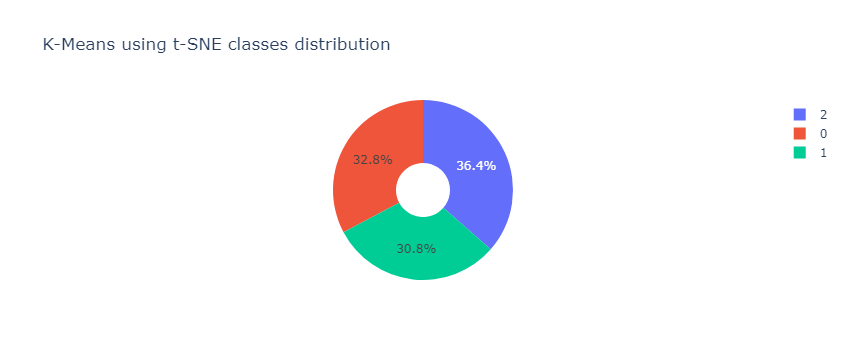

In [36]:
plot_cluster_distribution(value_counts, 'K-Means')

In [37]:
kmeans_tsne = X_with_labels.groupby('kmeans_tsne')

In [38]:
n = kmeans_tsne['kmeans_tsne'].count().count() # number of cluster
for i in range(0,n):
    display(kmeans_tsne.get_group(i))

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
1          0.770972         0.539328    0.673774        0.444529   
5          0.913731         0.870851    0.476131        0.745258   
7          0.916054         0.866962    0.491577        0.753711   
8          0.875881         0.808581    0.437893        0.696246   
12         0.904365         0.529205    0.512571        0.822403   
...             ...              ...         ...             ...   
8710       0.753763         0.650193    0.611561        0.424712   
8725       0.859472         0.591069    0.577721        0.718901   
8745       0.859894         0.897421    0.719463        0.181414   
8748       0.858196         0.937465    0.463454        0.219193   
8789       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
1                           0.297219                        0.227549   
5                           0.676104                        0.443583   
7                           0.684742                        0.451553   
8                           0.626129                        0.398092   
12                          0.632893                        0.671998   
...                              ...                             ...   
8710                        0.223756                        0.326182   
8725                        0.444714                        0.657667   
8745                        0.024320                        0.103539   
8748                        0.080576                        0.140080   
8789                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  kmeans_tsne  
1                     0.212894            0  
5                     0.348734            0  
7                     0.355775            0  
8                     0.308817            0  
12                    0.494853            0  
...                        ...          ...  
8710                  0.140432            0  
8725                  0.360711            0  
8745                  0.063870            0  
8748                  0.000000            0  
8789                  0.275650            0  

[2881 rows x 8 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
3          0.466968         0.380891    0.074901        0.056849   
4          0.513760         0.468498    0.074901        0.056849   
6          0.670663         0.503637    0.457547        0.324453   
15         0.836114         0.000000    0.000000        0.000000   
...             ...              ...         ...             ...   
8784       0.656199         0.583869    0.396246        0.175712   
8785       0.654500         0.583869    0.396246        0.175712   
8786       0.654500         0.583869    0.396246        0.175712   
8787       0.642026         0.626764    0.305234        0.000000   
8788       0.817624         0.893283    0.324179        0.024556   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
3                           0.017754                        0.019922   
4                           0.017754                        0.019922   
6                           0.222082                        0.060118   
15                          0.000000                        0.000000   
...                              ...                             ...   
8784                        0.061346                        0.007953   
8785                        0.066435                        0.008176   
8786                        0.066435                        0.008176   
8787                        0.000000                        0.000000   
8788                        0.002465                        0.005934   

      Saturated Fatty Acids(g)  kmeans_tsne  
0                     0.030388            1  
3                     0.014394            1  
4                     0.014394            1  
6                     0.180322            1  
15                    0.000000            1  
...                        ...          ...  
8784                  0.122689            1  
8785                  0.129330            1  
8786                  0.129330            1  
8787                  0.000000            1  
8788                  0.009211            1  

[2706 rows x 8 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
2          0.624253         0.633388    0.203973        0.020652   
9          0.721842         0.757620    0.153183        0.055176   
10         0.857339         0.957418    0.221928        0.113698   
11         0.622139         0.616810    0.093208        0.030283   
14         0.816493         0.139076    0.695060        0.644735   
...             ...              ...         ...             ...   
8737       0.530571         0.481560    0.120725        0.018673   
8738       0.538306         0.494986    0.120725        0.018673   
8746       0.675185         0.694232    0.200382        0.072906   
8749       0.769417         0.000000    0.762047        0.442852   
8750       0.733270         0.000000    0.708751        0.396735   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
2                           0.366189                        0.275215   
9                           0.366189                        0.275215   
10                          0.366189                        0.275215   
11                          0.366189                        0.275215   
14                          0.511857                        0.352783   
...                              ...                             ...   
8737                        0.366189                        0.275215   
8738                        0.366189                        0.275215   
8746                        0.366189                        0.275215   
8749                        0.366189                        0.275215   
8750                        0.246740                        0.204303   

      Saturated Fatty Acids(g)  kmeans_tsne  
2                     0.003042            2  
9                     0.332758            2  
10                    0.332758            2  
11                    0.332758            2  
14                    0.395637            2  
...                        ...          ...  
8737                  0.332758            2  
8738                  0.332758            2  
8746                  0.017243            2  
8749                  0.332758            2  
8750                  0.180322            2  

[3203 rows x 8 columns]

### Insights

In [39]:
kmeans_tsne.get_group(0).describe()

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    2881.000000      2881.000000  2881.000000     2881.000000   
mean        0.856897         0.828019     0.476071        0.509568   
std         0.053305         0.132356     0.144647        0.192538   
min         0.647502         0.223869     0.000000        0.000000   
25%         0.825301         0.739838     0.395116        0.373287   
50%         0.867304         0.877560     0.484115        0.531641   
75%         0.896680         0.930038     0.566128        0.655307   
max         0.980913         0.986273     0.964519        0.950574   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     2881.000000                     2881.000000   
mean                         0.318969                        0.289127   
std                          0.177722                        0.173976   
min                          0.000000                        0.000000   
25%                          0.192288                        0.159078   
50%                          0.328330                        0.268672   
75%                          0.431838                        0.395934   
max                          0.884828                        0.930554   

       Saturated Fatty Acids(g)  kmeans_tsne  
count               2881.000000       2881.0  
mean                   0.291906          0.0  
std                    0.172595          0.0  
min                    0.000000          0.0  
25%                    0.140432          0.0  
50%                    0.297769          0.0  
75%                    0.414459          0.0  
max                    0.903884          0.0

Cluster 0: This cluster seems to segment foods that are with high lipid (fats).

In [40]:
kmeans_tsne.get_group(1).describe()

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    2706.000000      2706.000000  2706.000000     2706.000000   
mean        0.593779         0.496341     0.242077        0.110357   
std         0.130450         0.200529     0.176489        0.107886   
min         0.000000         0.000000     0.000000        0.000000   
25%         0.534489         0.389766     0.111476        0.022613   
50%         0.608772         0.508044     0.222338        0.071353   
75%         0.670663         0.625015     0.326245        0.173777   
max         0.881090         1.000000     1.000000        0.452995   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     2706.000000                     2706.000000   
mean                         0.064451                        0.057194   
std                          0.102713                        0.077563   
min                          0.000000                        0.000000   
25%                          0.002242                        0.008176   
50%                          0.011206                        0.026302   
75%                          0.083004                        0.067959   
max                          0.366189                        0.363535   

       Saturated Fatty Acids(g)  kmeans_tsne  
count               2706.000000       2706.0  
mean                   0.049190          1.0  
std                    0.072921          0.0  
min                    0.000000          1.0  
25%                    0.003688          1.0  
50%                    0.014803          1.0  
75%                    0.063707          1.0  
max                    0.376808          1.0

Cluster 1: The maximum values for the fatty acids in this cluster were the lowest among all the cluster. Hence can conclude that this cluster is food that low in fatty acids. This suggests that this cluster may consists of healthy food.

In [41]:
kmeans_tsne.get_group(2).describe()

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    3203.000000      3203.000000  3203.000000     3203.000000   
mean        0.770124         0.106733     0.617946        0.501456   
std         0.104005         0.196605     0.212165        0.214933   
min         0.000000         0.000000     0.000000        0.000000   
25%         0.728185         0.000000     0.632648        0.375214   
50%         0.773274         0.000000     0.692694        0.499787   
75%         0.817060         0.131533     0.737274        0.632746   
max         1.000000         0.999571     1.000000        1.000000   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     3203.000000                     3203.000000   
mean                         0.380890                        0.200964   
std                          0.163433                        0.154932   
min                          0.000000                        0.000000   
25%                          0.269645                        0.090630   
50%                          0.366189                        0.157914   
75%                          0.467320                        0.275215   
max                          1.000000                        1.000000   

       Saturated Fatty Acids(g)  kmeans_tsne  
count               3203.000000       3203.0  
mean                   0.342385          2.0  
std                    0.160672          0.0  
min                    0.000000          2.0  
25%                    0.228913          2.0  
50%                    0.332758          2.0  
75%                    0.433289          2.0  
max                    1.000000          2.0

Cluster 2: This cluster predominantly consists of low-carb foods, with approximately half of the data falling into this category. The statistical analysis reveals that this cluster exhibits the highest Q1 range for protein, reaching 0.63. Consequently, it can be inferred that Cluster 0 is primarily composed of protein-rich foods.

## Agglomerative Clustering

In [42]:
from clustering_function import tuning_agglomerative, perform_agg_clustering

In [43]:
agg_param_grid = {
      'n_clusters': [2, 3, 4, 5, 6],
      'linkage': ['ward'],
      'affinity' : ['euclidean']
  }

In [44]:
tuning_agglomerative(X_tsne_reduced, agg_param_grid)

Best silhouette score: 0.37998518
Best parameters: {'affinity': 'euclidean', 'linkage': 'ward', 'n_clusters': 3}


In [45]:
Agg_tsne_clust_labels,agg_model = perform_agg_clustering(X_tsne_reduced, 3)

In [46]:
# export model
with open('../Model_fitted/Agg_model_mean_pkl', 'wb') as files:
    pickle.dump(agg_model, files)

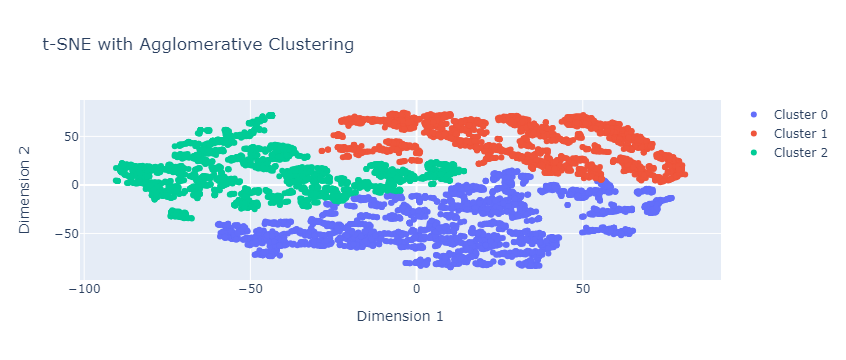

In [47]:
plot_clusters(X_tsne_reduced, Agg_tsne_clust_labels, "Agglomerative Clustering")

In [48]:
X_with_labels['Agg_tsne'] = Agg_tsne_clust_labels
scores['Agg_tsne'] = (silhouette_score(X_tsne_reduced, X_with_labels['Agg_tsne']))

In [49]:
food_groups, value_counts = get_food_groups(X_with_labels['Agg_tsne'], 'Agglomerative_tsne',food_groups)

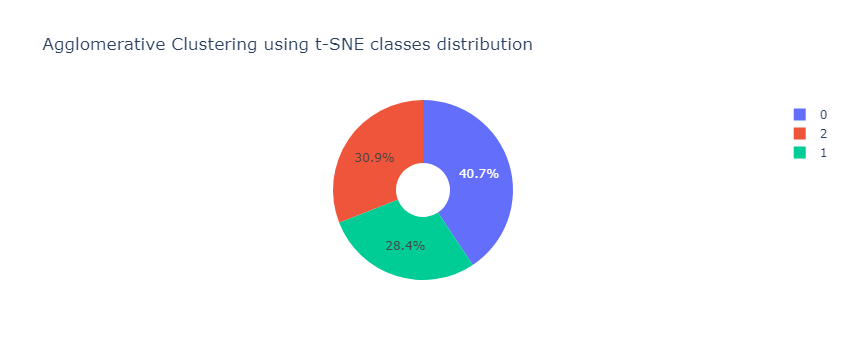

In [50]:
plot_cluster_distribution(value_counts, 'Agglomerative Clustering')

In [51]:
Aggtsne = X_with_labels.groupby('Agg_tsne')

In [52]:
n = Aggtsne['Agg_tsne'].count().count() # number of cluster
for i in range(0,n):
    display(Aggtsne.get_group(i))

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
1          0.770972         0.539328    0.673774        0.444529   
5          0.913731         0.870851    0.476131        0.745258   
7          0.916054         0.866962    0.491577        0.753711   
8          0.875881         0.808581    0.437893        0.696246   
12         0.904365         0.529205    0.512571        0.822403   
...             ...              ...         ...             ...   
8733       0.822060         0.189696    0.614397        0.684976   
8745       0.859894         0.897421    0.719463        0.181414   
8748       0.858196         0.937465    0.463454        0.219193   
8788       0.817624         0.893283    0.324179        0.024556   
8789       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
1                           0.297219                        0.227549   
5                           0.676104                        0.443583   
7                           0.684742                        0.451553   
8                           0.626129                        0.398092   
12                          0.632893                        0.671998   
...                              ...                             ...   
8733                        0.366189                        0.275215   
8745                        0.024320                        0.103539   
8748                        0.080576                        0.140080   
8788                        0.002465                        0.005934   
8789                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  
1                     0.212894            0         0  
5                     0.348734            0         0  
7                     0.355775            0         0  
8                     0.308817            0         0  
12                    0.494853            0         0  
...                        ...          ...       ...  
8733                  0.478288            2         0  
8745                  0.063870            0         0  
8748                  0.000000            0         0  
8788                  0.009211            1         0  
8789                  0.275650            0         0  

[3575 rows x 9 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
14         0.816493         0.139076    0.695060        0.644735   
17         0.499756         0.180474    0.049673        0.000000   
18         0.494774         0.135628    0.040586        0.000000   
22         0.549195         0.298750    0.068448        0.000000   
...             ...              ...         ...             ...   
8732       0.693313         0.000000    0.737760        0.087856   
8749       0.769417         0.000000    0.762047        0.442852   
8750       0.733270         0.000000    0.708751        0.396735   
8771       0.632419         0.346116    0.532774        0.232190   
8773       0.673693         0.347863    0.512571        0.388237   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
14                          0.511857                        0.352783   
17                          0.366189                        0.275215   
18                          0.366189                        0.275215   
22                          0.366189                        0.275215   
...                              ...                             ...   
8732                        0.065427                        0.005708   
8749                        0.366189                        0.275215   
8750                        0.246740                        0.204303   
8771                        0.089229                        0.016934   
8773                        0.257480                        0.088905   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  
0                     0.030388            1         1  
14                    0.395637            2         1  
17                    0.332758            1         1  
18                    0.332758            1         1  
22                    0.332758            1         1  
...                        ...          ...       ...  
8732                  0.019256            1         1  
8749                  0.332758            2         1  
8750                  0.180322            2         1  
8771                  0.175470            1         1  
8773                  0.267429            1         1  

[2496 rows x 9 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
2          0.624253         0.633388    0.203973        0.020652   
3          0.466968         0.380891    0.074901        0.056849   
4          0.513760         0.468498    0.074901        0.056849   
6          0.670663         0.503637    0.457547        0.324453   
9          0.721842         0.757620    0.153183        0.055176   
...             ...              ...         ...             ...   
8783       0.556031         0.463708    0.351950        0.035864   
8784       0.656199         0.583869    0.396246        0.175712   
8785       0.654500         0.583869    0.396246        0.175712   
8786       0.654500         0.583869    0.396246        0.175712   
8787       0.642026         0.626764    0.305234        0.000000   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
2                           0.366189                        0.275215   
3                           0.017754                        0.019922   
4                           0.017754                        0.019922   
6                           0.222082                        0.060118   
9                           0.366189                        0.275215   
...                              ...                             ...   
8783                        0.010777                        0.001153   
8784                        0.061346                        0.007953   
8785                        0.066435                        0.008176   
8786                        0.066435                        0.008176   
8787                        0.000000                        0.000000   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  
2                     0.003042            2         2  
3                     0.014394            1         2  
4                     0.014394            1         2  
6                     0.180322            1         2  
9                     0.332758            2         2  
...                        ...          ...       ...  
8783                  0.024012            1         2  
8784                  0.122689            1         2  
8785                  0.129330            1         2  
8786                  0.129330            1         2  
8787                  0.000000            1         2  

[2719 rows x 9 columns]

### Insights

In [53]:
Aggtsne.get_group(0).describe()

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    3575.000000      3575.000000  3575.000000     3575.000000   
mean        0.857922         0.715099     0.477681        0.547721   
std         0.061248         0.276715     0.176342        0.213171   
min         0.642026         0.000000     0.000000        0.000000   
25%         0.820412         0.612620     0.395116        0.402221   
50%         0.866095         0.838808     0.500449        0.557431   
75%         0.900253         0.920900     0.588978        0.695723   
max         1.000000         0.986273     0.964519        1.000000   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     3575.000000                     3575.000000   
mean                         0.358020                        0.304295   
std                          0.203570                        0.186203   
min                          0.000000                        0.000000   
25%                          0.216206                        0.166283   
50%                          0.365167                        0.275215   
75%                          0.478891                        0.411338   
max                          1.000000                        1.000000   

       Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  
count               3575.000000  3575.000000    3575.0  
mean                   0.327336     0.391049       0.0  
std                    0.195454     0.788720       0.0  
min                    0.000000     0.000000       0.0  
25%                    0.162329     0.000000       0.0  
50%                    0.324955     0.000000       0.0  
75%                    0.457748     0.000000       0.0  
max                    1.000000     2.000000       0.0

Cluster 0: This cluster may consist of foods high in energy because its minimum Energy (Kcal) value is 0.64, the highest of all the clusters. Based on the three fatty acid compositions, this cluster indicates that the meal in this cluster is maximal in fat. The fact that this food cluster has the highest value of total lipids among all clusters serves as additional support.

In [54]:
Aggtsne.get_group(1).describe()

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    2496.000000      2496.000000  2496.000000     2496.000000   
mean        0.750901         0.034090     0.690468        0.449770   
std         0.082640         0.090111     0.116316        0.165800   
min         0.000000         0.000000     0.000000        0.000000   
25%         0.717455         0.000000     0.673450        0.350888   
50%         0.759726         0.000000     0.706387        0.460756   
75%         0.795161         0.000000     0.744222        0.572794   
max         0.979797         0.577933     1.000000        0.963647   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     2496.000000                     2496.000000   
mean                         0.315442                        0.136407   
std                          0.141255                        0.083420   
min                          0.000000                        0.000000   
25%                          0.216787                        0.072776   
50%                          0.320430                        0.111524   
75%                          0.420326                        0.182060   
max                          0.697127                        0.456676   

       Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  
count               2496.000000  2496.000000    2496.0  
mean                   0.286678     1.909455       1.0  
std                    0.134869     0.287018       0.0  
min                    0.000000     1.000000       1.0  
25%                    0.190058     2.000000       1.0  
50%                    0.285095     2.000000       1.0  
75%                    0.376221     2.000000       1.0  
max                    0.672671     2.000000       1.0

Cluster 1: This cluster seems to be a low-carb meal cluster, as Q1, Q2, and Q3 have carbohydrate values of 0. The greatest value of carbohydrates was about 0.58g (after log tansform and min max scaled).

In [55]:
Aggtsne.get_group(2).describe()

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    2719.000000      2719.000000  2719.000000     2719.000000   
mean        0.588774         0.525531     0.211395        0.107439   
std         0.130580         0.177332     0.137212        0.109895   
min         0.000000         0.000000     0.000000        0.000000   
25%         0.526545         0.425016     0.104626        0.020652   
50%         0.599134         0.529017     0.210984        0.065026   
75%         0.666784         0.635244     0.307483        0.167867   
max         0.881090         1.000000     0.715473        0.606244   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     2719.000000                     2719.000000   
mean                         0.090504                        0.074699   
std                          0.131927                        0.096728   
min                          0.000000                        0.000000   
25%                          0.002465                        0.008956   
50%                          0.012701                        0.028458   
75%                          0.131662                        0.093038   
max                          0.565610                        0.363535   

       Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  
count               2719.000000  2719.000000    2719.0  
mean                   0.068030     1.084222       2.0  
std                    0.100881     0.300670       0.0  
min                    0.000000     0.000000       2.0  
25%                    0.003688     1.000000       2.0  
50%                    0.015416     1.000000       2.0  
75%                    0.089440     1.000000       2.0  
max                    0.376808     2.000000       2.0

Cluster 2: This cluster of food having quite a lower fats value (lipids, 3 fatty acids).

## GMM

In [56]:
from clustering_function import gmm_bic_score, perform_gmm_clustering
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

In [57]:
gmm_param_grid = {
    "n_components": range(1, 6),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=gmm_param_grid, scoring=gmm_bic_score
)

In [58]:
grid_search.fit(X_tsne_reduced)
Gmm_tsne_results = grid_search.cv_results_

In [59]:
Gmm_tsne_df = pd.DataFrame(Gmm_tsne_results)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
Gmm_tsne_df["mean_test_score"] = -Gmm_tsne_df["mean_test_score"]
Gmm_tsne_df = Gmm_tsne_df.rename(
    columns={
        "param_n_components": "Number of Components",
        "param_covariance_type": "Type of Covariance",
        "mean_test_score": "BIC Score",
    }
)
Gmm_tsne_df.sort_values(by="BIC Score").head()

Number of Components Type of Covariance     BIC Score
9                     5               tied  36384.557697
14                    5               diag  36410.367803
13                    4               diag  36419.033975
12                    3               diag  36428.055152
2                     3          spherical  36446.859841

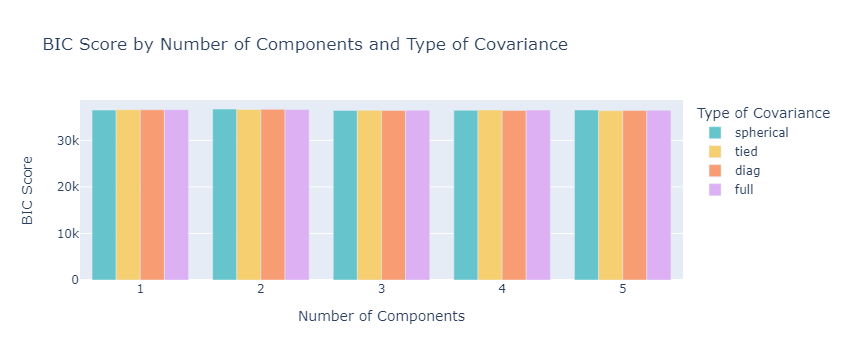

In [60]:
fig = px.bar(Gmm_tsne_df, x="Number of Components", y="BIC Score",
                 color="Type of Covariance", barmode="group",
                 title="BIC Score by Number of Components and Type of Covariance",
                 color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [61]:
Gmm_tsne_labels,gmm_model = perform_gmm_clustering(X_tsne_reduced, 5, 'tied')

In [62]:
# export model
with open('../Model_fitted/Gmm_model_mean_pkl', 'wb') as files:
    pickle.dump(gmm_model, files)

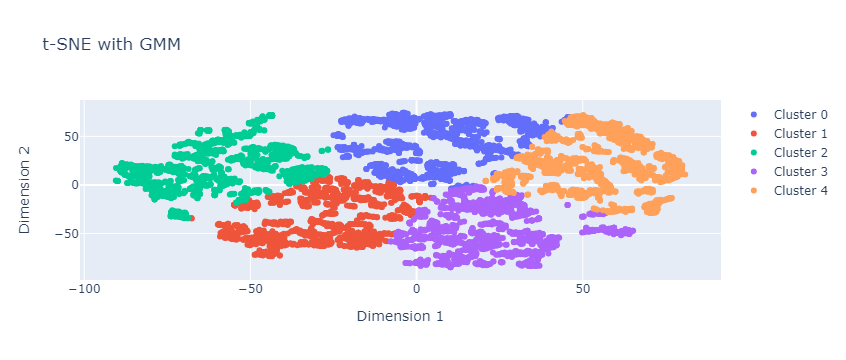

In [63]:
plot_clusters(X_tsne_reduced, Gmm_tsne_labels, "GMM")

In [64]:
X_with_labels['Gmm_tsne'] = Gmm_tsne_labels
scores['Gmm_tsne'] = (silhouette_score(X_tsne_reduced, X_with_labels['Gmm_tsne']))

In [65]:
food_groups, value_counts = get_food_groups(X_with_labels['Gmm_tsne'], 'GMM_tsne',food_groups)

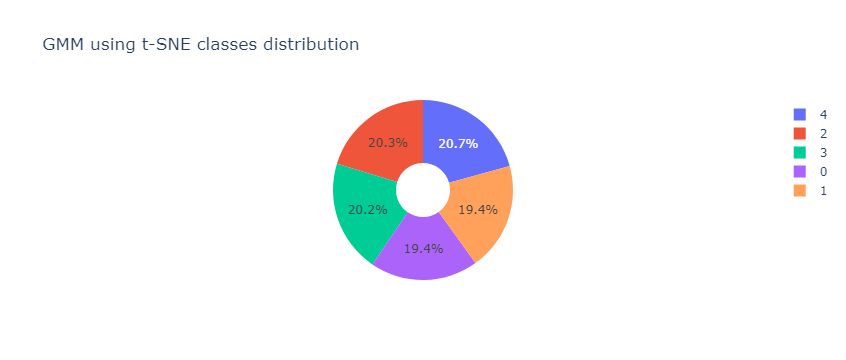

In [66]:
plot_cluster_distribution(value_counts, 'GMM')

In [67]:
GmmTsne = X_with_labels.groupby('Gmm_tsne')

In [68]:
n = GmmTsne['Gmm_tsne'].count().count() # number of cluster
for i in range(0,n):
    display(GmmTsne.get_group(i))

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
2          0.624253         0.633388    0.203973        0.020652   
9          0.721842         0.757620    0.153183        0.055176   
10         0.857339         0.957418    0.221928        0.113698   
11         0.622139         0.616810    0.093208        0.030283   
...             ...              ...         ...             ...   
8746       0.675185         0.694232    0.200382        0.072906   
8749       0.769417         0.000000    0.762047        0.442852   
8750       0.733270         0.000000    0.708751        0.396735   
8771       0.632419         0.346116    0.532774        0.232190   
8773       0.673693         0.347863    0.512571        0.388237   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
2                           0.366189                        0.275215   
9                           0.366189                        0.275215   
10                          0.366189                        0.275215   
11                          0.366189                        0.275215   
...                              ...                             ...   
8746                        0.366189                        0.275215   
8749                        0.366189                        0.275215   
8750                        0.246740                        0.204303   
8771                        0.089229                        0.016934   
8773                        0.257480                        0.088905   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  
0                     0.030388            1         1         0  
2                     0.003042            2         2         0  
9                     0.332758            2         2         0  
10                    0.332758            2         2         0  
11                    0.332758            2         2         0  
...                        ...          ...       ...       ...  
8746                  0.017243            2         2         0  
8749                  0.332758            2         1         0  
8750                  0.180322            2         1         0  
8771                  0.175470            1         1         0  
8773                  0.267429            1         1         0  

[1707 rows x 10 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
6          0.670663         0.503637    0.457547        0.324453   
38         0.804069         0.726613    0.104626        0.466242   
96         0.869694         0.908630    0.596203        0.451112   
116        0.704670         0.574444    0.129605        0.452995   
121        0.730240         0.670551    0.399229        0.362986   
...             ...              ...         ...             ...   
8781       0.606421         0.375597    0.333329        0.313517   
8784       0.656199         0.583869    0.396246        0.175712   
8785       0.654500         0.583869    0.396246        0.175712   
8786       0.654500         0.583869    0.396246        0.175712   
8788       0.817624         0.893283    0.324179        0.024556   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
6                           0.222082                        0.060118   
38                          0.082458                        0.029681   
96                          0.222501                        0.307274   
116                         0.197598                        0.363535   
121                         0.243782                        0.154621   
...                              ...                             ...   
8781                        0.143763                        0.020346   
8784                        0.061346                        0.007953   
8785                        0.066435                        0.008176   
8786                        0.066435                        0.008176   
8788                        0.002465                        0.005934   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  
6                     0.180322            1         2         1  
38                    0.442903            0         0         1  
96                    0.196858            0         0         1  
116                   0.158228            1         2         1  
121                   0.183371            0         0         1  
...                        ...          ...       ...       ...  
8781                  0.247258            1         2         1  
8784                  0.122689            1         2         1  
8785                  0.129330            1         2         1  
8786                  0.129330            1         2         1  
8788                  0.009211            1         0         1  

[1706 rows x 10 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
3          0.466968         0.380891    0.074901        0.056849   
4          0.513760         0.468498    0.074901        0.056849   
15         0.836114         0.000000    0.000000        0.000000   
16         0.499756         0.210347    0.047885        0.000000   
19         0.565722         0.123719    0.049673        0.000000   
...             ...              ...         ...             ...   
8779       0.611086         0.451652    0.407945        0.202832   
8780       0.594066         0.468248    0.424417        0.035864   
8782       0.556031         0.463708    0.351950        0.035864   
8783       0.556031         0.463708    0.351950        0.035864   
8787       0.642026         0.626764    0.305234        0.000000   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
3                           0.017754                        0.019922   
4                           0.017754                        0.019922   
15                          0.000000                        0.000000   
16                          0.000000                        0.000000   
19                          0.000000                        0.000000   
...                              ...                             ...   
8779                        0.079945                        0.009954   
8780                        0.010777                        0.001153   
8782                        0.010777                        0.001153   
8783                        0.010777                        0.001153   
8787                        0.000000                        0.000000   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  
3                     0.014394            1         2         2  
4                     0.014394            1         2         2  
15                    0.000000            1         2         2  
16                    0.000000            1         2         2  
19                    0.000000            1         2         2  
...                        ...          ...       ...       ...  
8779                  0.151654            1         2         2  
8780                  0.024012            1         2         2  
8782                  0.024012            1         2         2  
8783                  0.024012            1         2         2  
8787                  0.000000            1         2         2  

[1782 rows x 10 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
1          0.770972         0.539328    0.673774        0.444529   
5          0.913731         0.870851    0.476131        0.745258   
7          0.916054         0.866962    0.491577        0.753711   
8          0.875881         0.808581    0.437893        0.696246   
12         0.904365         0.529205    0.512571        0.822403   
...             ...              ...         ...             ...   
8724       0.787071         0.511548    0.674528        0.527313   
8725       0.859472         0.591069    0.577721        0.718901   
8730       0.742001         0.353022    0.611561        0.496744   
8731       0.776288         0.412147    0.653097        0.543778   
8789       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
1                           0.297219                        0.227549   
5                           0.676104                        0.443583   
7                           0.684742                        0.451553   
8                           0.626129                        0.398092   
12                          0.632893                        0.671998   
...                              ...                             ...   
8724                        0.338834                        0.418028   
8725                        0.444714                        0.657667   
8730                        0.247492                        0.394092   
8731                        0.282218                        0.443141   
8789                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  
1                     0.212894            0         0         3  
5                     0.348734            0         0         3  
7                     0.355775            0         0         3  
8                     0.308817            0         0         3  
12                    0.494853            0         0         3  
...                        ...          ...       ...       ...  
8724                  0.225271            2         0         3  
8725                  0.360711            0         0         3  
8730                  0.182233            2         0         3  
8731                  0.209057            2         0         3  
8789                  0.275650            0         0         3  

[1777 rows x 10 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
14         0.816493         0.139076    0.695060        0.644735   
103        0.999184         0.000000    0.000000        0.998925   
112        0.770972         0.000000    0.740576        0.500649   
115        0.743873         0.372124    0.580364        0.515397   
408        0.770197         0.198541    0.611561        0.592480   
...             ...              ...         ...             ...   
8721       0.818186         0.421638    0.673450        0.633388   
8722       0.792514         0.408888    0.617197        0.603454   
8723       0.812468         0.473672    0.661235        0.615169   
8726       0.792514         0.405580    0.610130        0.607430   
8733       0.822060         0.189696    0.614397        0.684976   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
14                          0.511857                        0.352783   
103                         0.861886                        0.577201   
112                         0.377811                        0.098613   
115                         0.396354                        0.114924   
408                         0.446801                        0.319664   
...                              ...                             ...   
8721                        0.384040                        0.515520   
8722                        0.366189                        0.275215   
8723                        0.358018                        0.529973   
8726                        0.317862                        0.517992   
8733                        0.366189                        0.275215   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  
14                    0.395637            2         1         4  
103                   0.807114            2         0         4  
112                   0.327957            2         1         4  
115                   0.358597            2         0         4  
408                   0.356205            2         0         4  
...                        ...          ...       ...       ...  
8721                  0.324161            2         0         4  
8722                  0.332758            2         0         4  
8723                  0.261219            2         0         4  
8726                  0.247540            2         0         4  
8733                  0.478288            2         0         4  

[1818 rows x 10 columns]

### Insights

In [69]:
GmmTsne.get_group(0).describe()

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    1707.000000      1707.000000  1707.000000     1707.000000   
mean        0.680455         0.182076     0.552924        0.276885   
std         0.101231         0.245183     0.244190        0.150226   
min         0.000000         0.000000     0.000000        0.000000   
25%         0.651043         0.000000     0.370398        0.157120   
50%         0.707079         0.000000     0.680366        0.317558   
75%         0.736239         0.381809     0.710725        0.393939   
max         0.880357         0.999571     1.000000        0.552750   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     1707.000000                     1707.000000   
mean                         0.247276                        0.162559   
std                          0.106326                        0.097106   
min                          0.000000                        0.000000   
25%                          0.172127                        0.069633   
50%                          0.254151                        0.144700   
75%                          0.366189                        0.275215   
max                          0.434080                        0.400966   

       Saturated Fatty Acids(g)  kmeans_tsne     Agg_tsne  Gmm_tsne  
count               1707.000000  1707.000000  1707.000000    1707.0  
mean                   0.187461     1.773286     1.224370       0.0  
std                    0.101656     0.418828     0.458773       0.0  
min                    0.000000     1.000000     0.000000       0.0  
25%                    0.112463     2.000000     1.000000       0.0  
50%                    0.192454     2.000000     1.000000       0.0  
75%                    0.264084     2.000000     1.000000       0.0  
max                    0.369373     2.000000     2.000000       0.0

Cluster 0: This cluster seems to classified foods that are low in carbs and high in protein, while having a lower fat value compared to cluster 4.

In [70]:
GmmTsne.get_group(1).describe()

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    1706.000000      1706.000000  1706.000000     1706.000000   
mean        0.783448         0.774047     0.430207        0.299880   
std         0.087921         0.179882     0.154111        0.127095   
min         0.556031         0.223869     0.000000        0.000000   
25%         0.709449         0.644818     0.326245        0.212186   
50%         0.813629         0.833784     0.449123        0.313007   
75%         0.865283         0.941409     0.523007        0.388237   
max         0.889265         0.985655     0.964519        0.774539   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     1706.000000                     1706.000000   
mean                         0.148001                        0.142956   
std                          0.103246                        0.098655   
min                          0.000000                        0.000000   
25%                          0.058584                        0.061937   
50%                          0.138891                        0.128574   
75%                          0.217732                        0.204947   
max                          0.565610                        0.518802   

       Saturated Fatty Acids(g)  kmeans_tsne     Agg_tsne  Gmm_tsne  
count               1706.000000  1706.000000  1706.000000    1706.0  
mean                   0.137206     0.314771     0.620164       1.0  
std                    0.100315     0.464561     0.925325       0.0  
min                    0.000000     0.000000     0.000000       1.0  
25%                    0.058201     0.000000     0.000000       1.0  
50%                    0.124368     0.000000     0.000000       1.0  
75%                    0.195899     1.000000     2.000000       1.0  
max                    0.756575     1.000000     2.000000       1.0

Cluster 1: This cluster also contains food that rich in carbohydrate and a slight high value in energy.

In [71]:
GmmTsne.get_group(2).describe()

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    1782.000000      1782.000000  1782.000000     1782.000000   
mean        0.560150         0.504315     0.172993        0.060993   
std         0.141922         0.194103     0.120504        0.060783   
min         0.000000         0.000000     0.000000        0.000000   
25%         0.499756         0.390393     0.074901        0.020652   
50%         0.571845         0.510934     0.163564        0.039505   
75%         0.631919         0.611978     0.262890        0.083478   
max         0.881090         1.000000     0.583785        0.335324   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     1782.000000                     1782.000000   
mean                         0.016707                        0.024447   
std                          0.029919                        0.032037   
min                          0.000000                        0.000000   
25%                          0.000899                        0.003897   
50%                          0.004240                        0.013470   
75%                          0.014398                        0.033112   
max                          0.366189                        0.275215   

       Saturated Fatty Acids(g)  kmeans_tsne     Agg_tsne  Gmm_tsne  
count               1782.000000       1782.0  1782.000000    1782.0  
mean                   0.017733          1.0     1.996633       2.0  
std                    0.028524          0.0     0.057944       0.0  
min                    0.000000          1.0     1.000000       2.0  
25%                    0.002177          1.0     2.000000       2.0  
50%                    0.007315          1.0     2.000000       2.0  
75%                    0.018855          1.0     2.000000       2.0  
max                    0.261484          1.0     2.000000       2.0

Cluster 2: Foods that fall under this category are thought to be lower in fat, or more healthful overall. This is due to the fact that 75% of the nutritional data for fats are less than 0.08, not even approaching 0.10.

In [72]:
GmmTsne.get_group(3).describe()

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    1777.000000      1777.000000  1777.000000     1777.000000   
mean        0.870493         0.799374     0.490202        0.629512   
std         0.050008         0.134809     0.136319        0.111925   
min         0.702221         0.288123     0.000000        0.150190   
25%         0.832088         0.697203     0.401073        0.547273   
50%         0.885056         0.856693     0.491577        0.626283   
75%         0.909274         0.911069     0.583137        0.705126   
max         0.980913         0.986273     0.898049        0.948652   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     1777.000000                     1777.000000   
mean                         0.418806                        0.367329   
std                          0.133467                        0.162870   
min                          0.000000                        0.000000   
25%                          0.338332                        0.255429   
50%                          0.403642                        0.352783   
75%                          0.493073                        0.474858   
max                          0.884828                        0.895755   

       Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  
count               1777.000000  1777.000000    1777.0    1777.0  
mean                   0.387549     0.086663       0.0       3.0  
std                    0.130613     0.407319       0.0       0.0  
min                    0.000000     0.000000       0.0       3.0  
25%                    0.302486     0.000000       0.0       3.0  
50%                    0.378754     0.000000       0.0       3.0  
75%                    0.468227     0.000000       0.0       3.0  
max                    0.903884     2.000000       0.0       3.0

Cluster 3: This is a high-energy cluster with the first quartile of the data lying at 0.83 (the highest among all clusters).

In [73]:
GmmTsne.get_group(4).describe()

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    1818.000000      1818.000000  1818.000000     1818.000000   
mean        0.824555         0.065997     0.631883        0.638771   
std         0.065663         0.126104     0.207649        0.149936   
min         0.683830         0.000000     0.000000        0.344354   
25%         0.779971         0.000000     0.634908        0.529629   
50%         0.805299         0.000000     0.700772        0.608085   
75%         0.846185         0.072906     0.743514        0.711088   
max         1.000000         0.585474     0.948462        1.000000   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     1818.000000                     1818.000000   
mean                         0.475669                        0.227587   
std                          0.144824                        0.185846   
min                          0.000000                        0.000000   
25%                          0.371740                        0.101313   
50%                          0.445074                        0.161448   
75%                          0.534229                        0.287198   
max                          1.000000                        1.000000   

       Saturated Fatty Acids(g)  kmeans_tsne     Agg_tsne  Gmm_tsne  
count               1818.000000  1818.000000  1818.000000    1818.0  
mean                   0.438066     1.986799     0.675468       4.0  
std                    0.139544     0.161996     0.468329       0.0  
min                    0.172905     0.000000     0.000000       4.0  
25%                    0.331712     2.000000     0.000000       4.0  
50%                    0.410238     2.000000     1.000000       4.0  
75%                    0.519668     2.000000     1.000000       4.0  
max                    1.000000     2.000000     1.000000       4.0

Cluster 4: Food cluster 1 and cluster 4 appear to be quite similar, while cluster 4 has higher protein and cholesterol values, as shown from the statistics above.

## K-Medoids

In [74]:
from clustering_function import tuning_kmedoids, perform_kmd_clustering

In [75]:
kmd_param_grid = {
    'n_clusters': [3, 4],
    'method': ['alternate', 'pam'],
    'init' : ['random', 'heuristic', 'k-medoids++', 'build']
}

In [76]:
tuning_kmedoids(X_tsne_reduced, kmd_param_grid)

Best silhouette score: 0.41803378
Best parameters: {'init': 'random', 'method': 'pam', 'n_clusters': 3}


In [77]:
Kmd_tsne_labels,kmd_model = perform_kmd_clustering(X_tsne_reduced, 3, 'random', 'pam')

In [78]:
# export model
with open('../Model_fitted/Kmd_model_mean_pkl', 'wb') as files:
    pickle.dump(kmd_model, files)

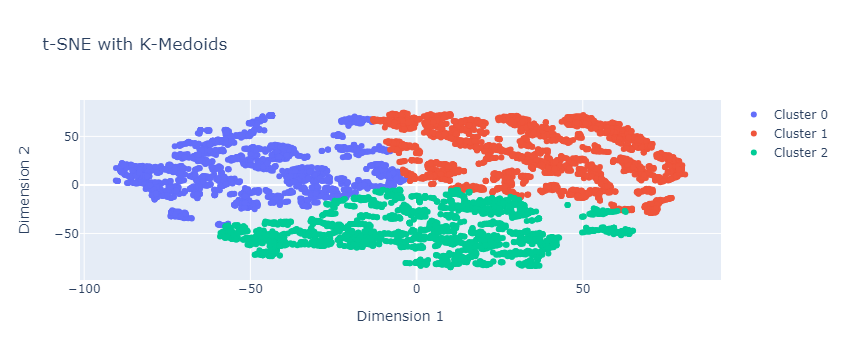

In [79]:
plot_clusters(X_tsne_reduced, Kmd_tsne_labels, "K-Medoids")

In [80]:
X_with_labels['Kmd_tsne'] = Kmd_tsne_labels
scores['Kmd_tsne'] = (silhouette_score(X_tsne_reduced, X_with_labels['Kmd_tsne']))

In [81]:
food_groups, value_counts = get_food_groups(X_with_labels['Kmd_tsne'], 'KMedoids_tsne',food_groups)

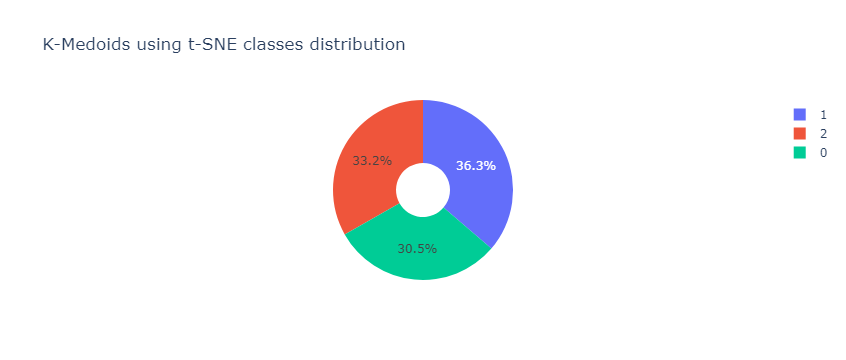

In [82]:
plot_cluster_distribution(value_counts, 'K-Medoids')

In [83]:
Kmdtsne = X_with_labels.groupby('Kmd_tsne')

In [84]:
n = Kmdtsne['Kmd_tsne'].count().count() # number of cluster
for i in range(0,n):
    display(Kmdtsne.get_group(i))

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
3          0.466968         0.380891    0.074901        0.056849   
4          0.513760         0.468498    0.074901        0.056849   
6          0.670663         0.503637    0.457547        0.324453   
15         0.836114         0.000000    0.000000        0.000000   
...             ...              ...         ...             ...   
8784       0.656199         0.583869    0.396246        0.175712   
8785       0.654500         0.583869    0.396246        0.175712   
8786       0.654500         0.583869    0.396246        0.175712   
8787       0.642026         0.626764    0.305234        0.000000   
8788       0.817624         0.893283    0.324179        0.024556   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
3                           0.017754                        0.019922   
4                           0.017754                        0.019922   
6                           0.222082                        0.060118   
15                          0.000000                        0.000000   
...                              ...                             ...   
8784                        0.061346                        0.007953   
8785                        0.066435                        0.008176   
8786                        0.066435                        0.008176   
8787                        0.000000                        0.000000   
8788                        0.002465                        0.005934   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  Kmd_tsne  
0                     0.030388            1         1         0         0  
3                     0.014394            1         2         2         0  
4                     0.014394            1         2         2         0  
6                     0.180322            1         2         1         0  
15                    0.000000            1         2         2         0  
...                        ...          ...       ...       ...       ...  
8784                  0.122689            1         2         1         0  
8785                  0.129330            1         2         1         0  
8786                  0.129330            1         2         1         0  
8787                  0.000000            1         2         2         0  
8788                  0.009211            1         0         1         0  

[2683 rows x 11 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
2          0.624253         0.633388    0.203973        0.020652   
9          0.721842         0.757620    0.153183        0.055176   
10         0.857339         0.957418    0.221928        0.113698   
11         0.622139         0.616810    0.093208        0.030283   
14         0.816493         0.139076    0.695060        0.644735   
...             ...              ...         ...             ...   
8737       0.530571         0.481560    0.120725        0.018673   
8738       0.538306         0.494986    0.120725        0.018673   
8746       0.675185         0.694232    0.200382        0.072906   
8749       0.769417         0.000000    0.762047        0.442852   
8750       0.733270         0.000000    0.708751        0.396735   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
2                           0.366189                        0.275215   
9                           0.366189                        0.275215   
10                          0.366189                        0.275215   
11                          0.366189                        0.275215   
14                          0.511857                        0.352783   
...                              ...                             ...   
8737                        0.366189                        0.275215   
8738                        0.366189                        0.275215   
8746                        0.366189                        0.275215   
8749                        0.366189                        0.275215   
8750                        0.246740                        0.204303   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  Kmd_tsne  
2                     0.003042            2         2         0         1  
9                     0.332758            2         2         0         1  
10                    0.332758            2         2         0         1  
11                    0.332758            2         2         0         1  
14                    0.395637            2         1         4         1  
...                        ...          ...       ...       ...       ...  
8737                  0.332758            2         2         0         1  
8738                  0.332758            2         2         0         1  
8746                  0.017243            2         2         0         1  
8749                  0.332758            2         1         0         1  
8750                  0.180322            2         1         0         1  

[3188 rows x 11 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
1          0.770972         0.539328    0.673774        0.444529   
5          0.913731         0.870851    0.476131        0.745258   
7          0.916054         0.866962    0.491577        0.753711   
8          0.875881         0.808581    0.437893        0.696246   
12         0.904365         0.529205    0.512571        0.822403   
...             ...              ...         ...             ...   
8710       0.753763         0.650193    0.611561        0.424712   
8725       0.859472         0.591069    0.577721        0.718901   
8745       0.859894         0.897421    0.719463        0.181414   
8748       0.858196         0.937465    0.463454        0.219193   
8789       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
1                           0.297219                        0.227549   
5                           0.676104                        0.443583   
7                           0.684742                        0.451553   
8                           0.626129                        0.398092   
12                          0.632893                        0.671998   
...                              ...                             ...   
8710                        0.223756                        0.326182   
8725                        0.444714                        0.657667   
8745                        0.024320                        0.103539   
8748                        0.080576                        0.140080   
8789                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  Kmd_tsne  
1                     0.212894            0         0         3         2  
5                     0.348734            0         0         3         2  
7                     0.355775            0         0         3         2  
8                     0.308817            0         0         3         2  
12                    0.494853            0         0         3         2  
...                        ...          ...       ...       ...       ...  
8710                  0.140432            0         0         3         2  
8725                  0.360711            0         0         3         2  
8745                  0.063870            0         0         1         2  
8748                  0.000000            0         0         1         2  
8789                  0.275650            0         0         3         2  

[2919 rows x 11 columns]

### Insights

In [85]:
Kmdtsne.get_group(0).describe()

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    2683.000000      2683.000000  2683.000000     2683.000000   
mean        0.592534         0.494531     0.241212        0.109156   
std         0.130118         0.199719     0.176914        0.106906   
min         0.000000         0.000000     0.000000        0.000000   
25%         0.534489         0.388237     0.110123        0.022613   
50%         0.608772         0.507003     0.221105        0.069789   
75%         0.669125         0.623374     0.324956        0.172803   
max         0.881090         1.000000     1.000000        0.452995   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     2683.000000                     2683.000000   
mean                         0.063744                        0.056722   
std                          0.102375                        0.077304   
min                          0.000000                        0.000000   
25%                          0.002242                        0.008176   
50%                          0.010991                        0.026199   
75%                          0.081911                        0.067226   
max                          0.366189                        0.363535   

       Saturated Fatty Acids(g)  kmeans_tsne     Agg_tsne     Gmm_tsne  \
count               2683.000000       2683.0  2683.000000  2683.000000   
mean                   0.048782          1.0     1.903839     1.520313   
std                    0.072706          0.0     0.314449     0.733161   
min                    0.000000          1.0     0.000000     0.000000   
25%                    0.003688          1.0     2.000000     1.000000   
50%                    0.014599          1.0     2.000000     2.000000   
75%                    0.062065          1.0     2.000000     2.000000   
max                    0.376808          1.0     2.000000     2.000000   

       Kmd_tsne  
count    2683.0  
mean        0.0  
std         0.0  
min         0.0  
25%         0.0  
50%         0.0  
75%         0.0  
max         0.0

Cluster 0: Foods in Cluster 0 have the lowest fat content, making them considered healthful.

In [86]:
Kmdtsne.get_group(1).describe()

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    3188.000000      3188.000000  3188.000000     3188.000000   
mean        0.769752         0.105460     0.618895        0.500463   
std         0.103970         0.195793     0.211576        0.214618   
min         0.000000         0.000000     0.000000        0.000000   
25%         0.728185         0.000000     0.634587        0.374830   
50%         0.772511         0.000000     0.693090        0.499463   
75%         0.816493         0.128562     0.737355        0.630279   
max         1.000000         0.999571     1.000000        1.000000   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     3188.000000                     3188.000000   
mean                         0.380408                        0.199953   
std                          0.163195                        0.153740   
min                          0.000000                        0.000000   
25%                          0.269014                        0.090473   
50%                          0.366189                        0.156743   
75%                          0.466690                        0.275215   
max                          1.000000                        1.000000   

       Saturated Fatty Acids(g)  kmeans_tsne     Agg_tsne     Gmm_tsne  \
count               3188.000000  3188.000000  3188.000000  3188.000000   
mean                   0.342301     1.999686     0.867629     2.321518   
std                    0.160727     0.017711     0.520113     1.958259   
min                    0.000000     1.000000     0.000000     0.000000   
25%                    0.228606     2.000000     1.000000     0.000000   
50%                    0.332758     2.000000     1.000000     4.000000   
75%                    0.432525     2.000000     1.000000     4.000000   
max                    1.000000     2.000000     2.000000     4.000000   

       Kmd_tsne  
count    3188.0  
mean        1.0  
std         0.0  
min         1.0  
25%         1.0  
50%         1.0  
75%         1.0  
max         1.0

Cluster 1: This food group is low in carbs and high in protein, as seen by the values of the two nutrients, which are 0.6 and 0.7 for protein and 0 to 0.12 for carbohydrates, respectively.

In [87]:
Kmdtsne.get_group(2).describe()

Energy (Kcal)  Carbohydrate(g)   Protein(g)  Total Lipid(g)  \
count    2919.000000      2919.000000  2919.000000     2919.000000   
mean        0.855929         0.824753     0.474715        0.508570   
std         0.054686         0.137360     0.145350        0.193939   
min         0.647502         0.000000     0.000000        0.000000   
25%         0.824497         0.735701     0.394739        0.372900   
50%         0.866902         0.876804     0.484115        0.530708   
75%         0.896351         0.929949     0.565603        0.655149   
max         0.980913         0.986273     0.964519        0.950574   

       Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
count                     2919.000000                     2919.000000   
mean                         0.318458                        0.288386   
std                          0.178343                        0.174783   
min                          0.000000                        0.000000   
25%                          0.191182                        0.158438   
50%                          0.326856                        0.266201   
75%                          0.431838                        0.394784   
max                          0.884828                        0.930554   

       Saturated Fatty Acids(g)  kmeans_tsne     Agg_tsne     Gmm_tsne  \
count               2919.000000  2919.000000  2919.000000  2919.000000   
mean                   0.290720     0.018499     0.020555     2.190134   
std                    0.172881     0.170675     0.201746     0.991305   
min                    0.000000     0.000000     0.000000     1.000000   
25%                    0.139566     0.000000     0.000000     1.000000   
50%                    0.296644     0.000000     0.000000     3.000000   
75%                    0.414360     0.000000     0.000000     3.000000   
max                    0.903884     2.000000     2.000000     4.000000   

       Kmd_tsne  
count    2919.0  
mean        2.0  
std         0.0  
min         2.0  
25%         2.0  
50%         2.0  
75%         2.0  
max         2.0

Cluster 3: This food cluster appeared to be food that provides more energy due to the carbohydrate composition as compared to other food clusters.

In [88]:
scores

{'kmeans_tsne': 0.41820893,
 'Agg_tsne': 0.37998518,
 'Gmm_tsne': 0.37181818,
 'Kmd_tsne': 0.41803378}

When the mean strategy was used to fill in the missing values in the dataset, it was found that the K-Means model was the most successful clustering method, with the highest silhouette score 0.4186 recorded.